# Customer Churn

The objective of this project is to create a classifier to predict is a customer is about to leave the service (by cancel a subscription for example).

This project is based on the kaggle challenge Telco Customer Churn (https://www.kaggle.com/blastchar/telco-customer-churn).

# Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('../data/Telco-Customer-Churn.csv', na_values=' ')

In [3]:
df_raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
pd.isna(df_raw).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df_raw.fillna(0, inplace=True)

In [6]:
np.sum(df_raw.duplicated())

0

In [7]:
df_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


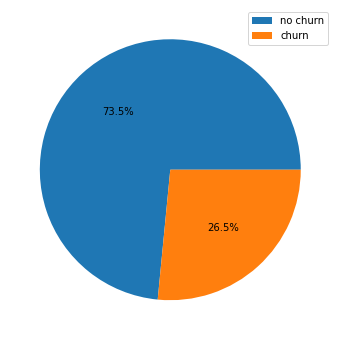

In [8]:
plt.figure(figsize=(6,6))

plt.pie([len(df_raw[df_raw['Churn']=='No']), len(df_raw[df_raw['Churn']=='Yes'])], autopct='%1.1f%%')

plt.legend(['no churn', 'churn'])
plt.show()

This pie chart shows us that we have around 3 times more non churners than churners.

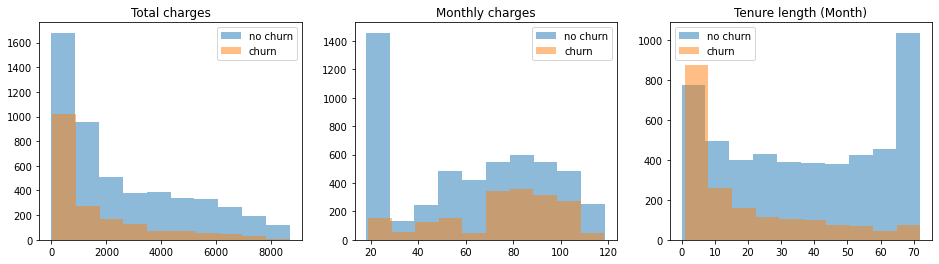

In [9]:
plt.figure(figsize=(16,4))

ax1 = plt.subplot(131)
plt.hist(df_raw[df_raw['Churn']=='No']['TotalCharges'], alpha = 0.5)
plt.hist(df_raw[df_raw['Churn']=='Yes']['TotalCharges'], alpha = 0.5)

ax2 = plt.subplot(132)
plt.hist(df_raw[df_raw['Churn']=='No']['MonthlyCharges'], alpha = 0.5)
plt.hist(df_raw[df_raw['Churn']=='Yes']['MonthlyCharges'], alpha = 0.5)

ax3 = plt.subplot(133)
plt.hist(df_raw[df_raw['Churn']=='No']['tenure'], alpha = 0.5)
plt.hist(df_raw[df_raw['Churn']=='Yes']['tenure'], alpha = 0.5)

ax1.set_title('Total charges')
ax1.legend(['no churn', 'churn'])

ax3.set_title('Tenure length (Month)')
ax3.legend(['no churn', 'churn'])

ax2.set_title('Monthly charges')
ax2.legend(['no churn', 'churn'])

plt.show()

These figures show us some of the tendancies that govern whether or not a customer will ending being a churner.

# Data prepartion

We will start by creating dummies for our categorical columns, and store this cleaned up dataframe in a new one.

In [10]:
df_clean = pd.DataFrame()

In [11]:
columns_to_dummify = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                      'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in columns_to_dummify:
    dummies_col = pd.get_dummies(df_raw[col], prefix=col, drop_first=True)
    for dummy_col in dummies_col.columns:
        df_clean[dummy_col] = dummies_col[dummy_col]

Then we add the rest of our columns to our clean dataframe.

In [12]:
df_clean['SeniorCitizen'] = df_raw['SeniorCitizen'] # Already usable as is

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges'] # These columns will need to be scaled up after our train test split
df_clean[columns_to_scale] = df_raw[columns_to_scale]

In [13]:
df_clean

,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,29.85,29.85
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,2,53.85,108.15
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,45,42.30,1840.75
4,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,0,0,0,...,1,0,1,0,0,1,0,24,84.80,1990.50
7039,0,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,0,0,72,103.20,7362.90
7040,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,11,29.60,346.45
7041,1,1,1,0,1,0,1,1,0,0,...,0,0,1,0,0,1,1,4,74.40,306.60


## Feature Engineering

To improve our performance, and according to the data exploration we did earlier, we can add new features to our dataset. Here, we will create 3 new columns, low tenure, high tenure and low charges.

In [14]:
df_clean['low_tenure'] = df_clean['tenure'].apply(lambda x: 1 if x <= 12 else 0)
df_clean['high_tenure'] = df_clean['tenure'].apply(lambda x: 1 if x >= 60 else 0)
df_clean['low_charges'] = df_clean['MonthlyCharges'].apply(lambda x: 1 if x <= 40 else 0)

In [15]:
df_clean

,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,low_tenure,high_tenure,low_charges
0,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,1,29.85,29.85,1,0,1
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,34,56.95,1889.50,0,0,0
2,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,2,53.85,108.15,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,45,42.30,1840.75,0,0,0
4,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,2,70.70,151.65,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,0,0,0,...,0,0,1,0,24,84.80,1990.50,0,0,0
7039,0,0,1,1,1,0,1,1,0,0,...,1,0,0,0,72,103.20,7362.90,0,1,0
7040,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,11,29.60,346.45,1,0,1
7041,1,1,1,0,1,0,1,1,0,0,...,0,0,1,1,4,74.40,306.60,1,0,0


## Splitting

We can now split our data, in order to start creating models.

In [16]:
X = df_clean.iloc[:,1:]
y = df_clean.iloc[:, 0]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

As our data is now split, we can scale everything without fear of data leakage.

In [18]:
from sklearn.preprocessing import StandardScaler

for col in X.columns:
    std = StandardScaler()
    std.fit(X_train[col].values.reshape(-1, 1))
    X_train[col] = std.transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = std.transform(X_test[col].values.reshape(-1, 1))

/home/romaincaplier/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/romaincaplier/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/romaincaplier/.pyenv/versions/3.7.6/envs/vivadata/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

To improve our computation times, we will also use a PCA on our data, which will reduce the number of features while keep the same amount of ionformation (retained variance).

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

pca.fit(X_train)
print('retained variance',np.sum(pca.explained_variance_ratio_))

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

retained variance 0.9915494375254382


# Modeling

We will now compare the performance of a few algorithms, first by simply running them without hyperparameters optimisation.

In [20]:
## This function will print us the results of a given model

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

def print_metrics(model, X_train, y_train, X_test, y_test):
    print('Train dataset')
    print('-------------')
    print('Accuracy: ', accuracy_score(y_train, model.predict(X_train)))
    print('Precision: ', precision_score(y_train, model.predict(X_train)))
    print('Recall: ', recall_score(y_train, model.predict(X_train)))
    print('F-score: ', f1_score(y_train, model.predict(X_train)))

    print('\n')

    print('Test dataset')
    print('-------------')
    print('Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Precision: ', precision_score(y_test, model.predict(X_test)))
    print('Recall: ', recall_score(y_test, model.predict(X_test)))
    print('F-score: ', f1_score(y_test, model.predict(X_test)))   

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [22]:
print_metrics(lr, X_train, y_train, X_test, y_test)

Train dataset
-------------
Accuracy:  0.8020944266950657
Precision:  0.6635111876075731
Recall:  0.5157190635451505
F-score:  0.5803537824614228


Test dataset
-------------
Accuracy:  0.8105039034776437
Precision:  0.6825938566552902
Recall:  0.5347593582887701
F-score:  0.5997001499250375


## SVM

In [23]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

SVC()

In [24]:
print_metrics(svm, X_train, y_train, X_test, y_test)

Train dataset
-------------
Accuracy:  0.8161164359247426
Precision:  0.7103574702108157
Recall:  0.5183946488294314
F-score:  0.5993812838360403


Test dataset
-------------
Accuracy:  0.7970191625266146
Precision:  0.6594202898550725
Recall:  0.48663101604278075
F-score:  0.5599999999999999


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
print_metrics(rf, X_train, y_train, X_test, y_test)

Train dataset
-------------
Accuracy:  0.9971600993965212
Precision:  0.9946488294314382
Recall:  0.9946488294314382
F-score:  0.9946488294314382


Test dataset
-------------
Accuracy:  0.7679205110007097
Precision:  0.5900383141762452
Recall:  0.4117647058823529
F-score:  0.48503937007874015


## Gradient boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [28]:
print_metrics(gb, X_train, y_train, X_test, y_test)

Train dataset
-------------
Accuracy:  0.8388356407525737
Precision:  0.7595048629531388
Recall:  0.5745819397993311
F-score:  0.6542269611576542


Test dataset
-------------
Accuracy:  0.7998580553584103
Precision:  0.6564625850340136
Recall:  0.516042780748663
F-score:  0.5778443113772453


## XGBoost

In [29]:
import xgboost as xgb

GBC = xgb.XGBClassifier()

GBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
print_metrics(GBC, X_train, y_train, X_test, y_test)

Train dataset
-------------
Accuracy:  0.9826056088036919
Precision:  0.9794097460535347
Recall:  0.954515050167224
F-score:  0.9668021680216802


Test dataset
-------------
Accuracy:  0.7750177430801988
Precision:  0.6014234875444839
Recall:  0.45187165775401067
F-score:  0.516030534351145


## Hyperparameter optimization

To improve the performance of our models, we can tweak our hyperparameters to get better results. We will here look at the improvements of the RandomForestClassifier.

In [31]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth': [5, 10, 20, 30, None], 'n_estimators': [10, 30, 50], 'criterion':['gini', 'entropy'],
                     'class_weight': ['balanced', 'balanced_subsample', None]}]

clf = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), tuned_parameters, cv=5, scoring='f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample',
                                           None],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 20, 30, None],
                          'n_estimators': [10, 30, 50]}],
             scoring='f1')

In [32]:
print_metrics(clf.best_estimator_, X_train, y_train, X_test, y_test)

Train dataset
-------------
Accuracy:  0.7719204827831025
Precision:  0.5473399458972047
Recall:  0.8120401337792642
F-score:  0.6539186641529761


Test dataset
-------------
Accuracy:  0.7487579843860894
Precision:  0.5181818181818182
Recall:  0.7620320855614974
F-score:  0.6168831168831169


## Imbalanced dataset

As we saw earlier, in our data exploration, our dataset is quite imbalanced (3 non churners for each churner). To tacle this issue, we will add a SMOTE, to add new rows in order to rebalance the dataset.

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y_train)

Let's now figure out how much of an improvement these new rows were.

### Logistic Regression

In [34]:
lr = LogisticRegression()

lr.fit(X_res, y_res)

LogisticRegression()

In [35]:
print_metrics(lr, X_train, y_train, X_test, y_test) # Better

Train dataset
-------------
Accuracy:  0.7559460418885339
Precision:  0.526857654431513
Recall:  0.7872909698996655
F-score:  0.631268436578171


Test dataset
-------------
Accuracy:  0.7565649396735273
Precision:  0.5276292335115864
Recall:  0.7914438502673797
F-score:  0.6331550802139037


### SVM

In [36]:
svm = SVC()

svm.fit(X_res, y_res)

SVC()

In [37]:
print_metrics(svm, X_train, y_train, X_test, y_test) # Much better

Train dataset
-------------
Accuracy:  0.8015619453319134
Precision:  0.5940149625935162
Recall:  0.7966555183946489
F-score:  0.6805714285714286


Test dataset
-------------
Accuracy:  0.7679205110007097
Precision:  0.5478615071283096
Recall:  0.7192513368983957
F-score:  0.6219653179190751


### Random Forest

For this estimator, we will use the hyperparameters found by our search.

In [38]:
clf.best_estimator_.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                       n_jobs=-1, random_state=0)

In [39]:
print_metrics(clf.best_estimator_, X_train, y_train, X_test, y_test) # Much better

Train dataset
-------------
Accuracy:  0.7678381256656017
Precision:  0.5428702430077946
Recall:  0.7919732441471572
F-score:  0.6441784548422199


Test dataset
-------------
Accuracy:  0.7608232789212207
Precision:  0.5345794392523364
Recall:  0.7647058823529411
F-score:  0.6292629262926291


### Gradient Boosting

In [40]:
gb = GradientBoostingClassifier()

gb.fit(X_res, y_res)

GradientBoostingClassifier()

In [41]:
print_metrics(gb, X_train, y_train, X_test, y_test)

Train dataset
-------------
Accuracy:  0.802626908058218
Precision:  0.5930063137445362
Recall:  0.8167224080267559
F-score:  0.6871131119864942


Test dataset
-------------
Accuracy:  0.7700496806245565
Precision:  0.5490196078431373
Recall:  0.7486631016042781
F-score:  0.6334841628959276


### XGBoost

In [42]:
GBC = xgb.XGBClassifier()

GBC.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
print_metrics(GBC, X_train, y_train, X_test, y_test)

Train dataset
-------------
Accuracy:  0.9666311679091232
Precision:  0.9031462060456509
Recall:  0.9792642140468227
F-score:  0.9396662387676509


Test dataset
-------------
Accuracy:  0.7629524485450674
Precision:  0.55
Recall:  0.5882352941176471
F-score:  0.5684754521963825


In the end, we can see that our f1-score improve substantially by using SMOTE, and that a simple logistic regression gives us our best result, with an f1-score of 0.63.